In [1]:
import numpy as np
import pandas as pd

In [2]:
d1={"Name":["Ramesh","Suresh",np.nan,"Mahesh"],"Age":[32,33,34,np.nan],"City":[np.nan,"Hyd","Mumbai","Channai"]}
data1=pd.DataFrame(d1)
data1

,Name,Age,City
0,Ramesh,32.0,NaN
1,Suresh,33.0,Hyd
2,NaN,34.0,Mumbai
3,Mahesh,NaN,Channai


In [3]:
data1.isnull()

,Name,Age,City
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


In [4]:
data1.isnull().sum()
# Every coumn has 1 missinig value is there

Name    1
Age     1
City    1
dtype: int64

In [5]:
data1.isnull().sum()/len(data1)

Name    0.25
Age     0.25
City    0.25
dtype: float64

In [6]:
data1.isnull().sum()*100/len(data1)

Name    25.0
Age     25.0
City    25.0
dtype: float64

In [7]:
d2={"Name":["Ramesh","Suresh",None,"Mahesh"],"Age":[32,33,34,None],"City":[None,"Hyd","Mumbai","Channai"]}

In [8]:
data2=pd.DataFrame(d2)


In [9]:
data2.isnull()

,Name,Age,City
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


In [10]:
data2.isnull().sum()

Name    1
Age     1
City    1
dtype: int64

In [11]:
d1={"Name":["Ramesh","Suresh","Null","Mahesh"],"Age":[32,33,34,"Null"],"City":["Null","Hyd","Mumbai","Channai"]}
d1

{'Name': ['Ramesh', 'Suresh', 'Null', 'Mahesh'],
 'Age': [32, 33, 34, 'Null'],
 'City': ['Null', 'Hyd', 'Mumbai', 'Channai']}

In [12]:
data3=pd.DataFrame(d1)
data3

,Name,Age,City
0,Ramesh,32,Null
1,Suresh,33,Hyd
2,Null,34,Mumbai
3,Mahesh,Null,Channai


In [13]:
data3.isnull()

,Name,Age,City
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


***Methode - 1***
- fill  the missing values with random number
- dataframe name= data1
- methode name:fillan

In [14]:
data1.fillna(40)

,Name,Age,City
0,Ramesh,32.0,40
1,Suresh,33.0,Hyd
2,40,34.0,Mumbai
3,Mahesh,40.0,Channai


***Method- 2***
- fill  the missing values with random number on specific column

In [15]:
data1["Name"].fillna("Satish",inplace=True)
data1

,Name,Age,City
0,Ramesh,32.0,NaN
1,Suresh,33.0,Hyd
2,Satish,34.0,Mumbai
3,Mahesh,NaN,Channai


In [16]:
# Create data again 
d1={"Name":["Ramesh","Suresh",np.nan,"Mahesh"],"Age":[32,33,34,np.nan],"City":[np.nan,"Hyd","Mumbai","Channai"]}
data1=pd.DataFrame(d1)
data1

,Name,Age,City
0,Ramesh,32.0,NaN
1,Suresh,33.0,Hyd
2,NaN,34.0,Mumbai
3,Mahesh,NaN,Channai


***Method -3***
- bfill
- ffill
- pad
- backfill

In [17]:
data1.fillna(method="backfill")
# Names index2 is missed value
# it will replace by index 3 value
# Age index3 is missed value
# we don't have index 4, so the value is NaN
# city index 0 has missed value
# it replace with  index 1 value

,Name,Age,City
0,Ramesh,32.0,Hyd
1,Suresh,33.0,Hyd
2,Mahesh,34.0,Mumbai
3,Mahesh,NaN,Channai


In [18]:
data1.fillna(method="bfill")

,Name,Age,City
0,Ramesh,32.0,Hyd
1,Suresh,33.0,Hyd
2,Mahesh,34.0,Mumbai
3,Mahesh,NaN,Channai


In [19]:
data1.fillna(method="ffill")

,Name,Age,City
0,Ramesh,32.0,NaN
1,Suresh,33.0,Hyd
2,Suresh,34.0,Mumbai
3,Mahesh,34.0,Channai


In [20]:
data1.fillna(method="pad")

,Name,Age,City
0,Ramesh,32.0,NaN
1,Suresh,33.0,Hyd
2,Suresh,34.0,Mumbai
3,Mahesh,34.0,Channai


- bfill and backfill both are same
- pad and ffill both are same

**Methode-4**
- mean 
- median
- mode

In [21]:
age_mean=data1["Age"].mean()
age_mean

33.0

In [22]:
data1["Age"].fillna(age_mean)

0    32.0
1    33.0
2    34.0
3    33.0
Name: Age, dtype: float64

In [23]:
# instead of provoiding a randdom number
# we are filling with mean of the data

In [24]:
age_median=data1["Age"].median()
age_median

33.0

In [25]:
data1["Age"].fillna(age_median)

0    32.0
1    33.0
2    34.0
3    33.0
Name: Age, dtype: float64

In [26]:
age_mode=data1["Age"].mode()
age_mode

0    32.0
1    33.0
2    34.0
Name: Age, dtype: float64

In [28]:
# level1: Mean Median Mode
# level2:bfill,ffill
# level3:

$Methode-5$
***KNN Imputer***
- in the imputer instead of tacking mean of all the values
- will chose navers data first 
- will take those mean only
- these only for Numerical data
- n_neighbors is parameter can choose by user
- if we dont choose by default it will takes as =5

**KNN Imputer** 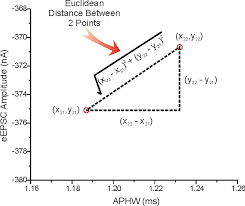

In [ ]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=2)
knn.fit_transform(data1[["Age"]])

In [ ]:
data1

**Method-6**

- Based on other columns

- Some times all above methods will not provide good justification

- at that time we need to check other columns dependancy also

- Most of the time will pick a column which have highest correlation